In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

##  Problem Statement

## Questions
* How many instances are there in the dataset ?
* What are few attributes that have correlation with bankrupt flag?
* What are the correlations between different financial indicators and the bankruptcy status?
* Are there statistically significant differences in financial indicators (e.g., ROA, debt ratios) between bankrupt and non-bankrupt companies?
* Which financial indicators are the most significant predictors of a company's bankruptcy status?
* What are the primary financial differences between companies that go bankrupt and those that remain solvent?
* What specific thresholds for key financial ratios (e.g., debt ratio, interest coverage ratio) are associated with a high risk of bankruptcy

In [3]:
df = pd.read_csv('data.csv')
df.isnull

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [4]:
df.index

RangeIndex(start=0, stop=6819, step=1)

In [5]:
df.columns
df.columns = df.columns.str.strip()

In [27]:
df['Revenue Per Share (Yuan ¥)']

0       0.017560
1       0.021144
2       0.005944
3       0.014368
4       0.029690
          ...   
6814    0.020766
6815    0.023050
6816    0.044255
6817    0.031535
6818    0.000665
Name: Revenue Per Share (Yuan ¥), Length: 6819, dtype: float64

In [6]:
# How many instances are there in the dataset ?
print("dataframe shape: ", df.shape)
print("There are ", df.shape[0], " instances in the dataframe")


dataframe shape:  (6819, 96)
There are  6819  instances in the dataframe


In [33]:
operExpRate = df[df['Operating Expense Rate'] > 1]
operExpRate

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801
14,0,0.506703,0.575829,0.569838,0.604686,0.604686,0.999053,0.797514,0.809456,0.303566,...,0.819715,0.003954,0.624946,0.604683,0.841624,0.277668,0.026896,0.565614,1,0.042646
18,0,0.504071,0.559802,0.558649,0.598344,0.598344,0.998989,0.797412,0.809334,0.303523,...,0.806264,0.004238,0.623339,0.598345,0.840955,0.280839,0.027637,0.567399,1,0.025953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6796,0,0.504071,0.569723,0.551689,0.604563,0.604563,0.999086,0.797607,0.809482,0.303659,...,0.818199,0.007434,0.624959,0.604561,0.841467,0.277307,0.026792,0.565164,1,0.047097
6804,0,0.478672,0.544701,0.530703,0.600744,0.600744,0.999006,0.797423,0.809344,0.303506,...,0.804195,0.003066,0.623762,0.600740,0.840497,0.276053,0.026791,0.565159,1,0.080805
6805,0,0.507239,0.566289,0.556240,0.603583,0.603590,0.999060,0.797465,0.809374,0.303466,...,0.817712,0.002497,0.624488,0.603581,0.841292,0.276354,0.026791,0.565158,1,0.068104
6810,0,0.578901,0.648005,0.631725,0.602841,0.602841,0.999026,0.797490,0.809402,0.303580,...,0.846995,0.000995,0.624040,0.602840,0.844588,0.280905,0.026813,0.565259,1,0.025787


In [8]:
totalDebtPerNetWorth = df['Total debt/Total net worth'] > 0.5
df[totalDebtPerNetWorth]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
427,1,0.311315,0.279655,0.360887,0.598293,0.598293,0.998511,0.796186,0.808234,0.302381,...,0.542326,0.000456,0.623593,0.598295,0.000000,0.745352,0.026749,0.564949,1,0.010437
1171,1,0.433676,0.490569,0.483109,0.590352,0.590352,0.998684,0.797092,0.809036,0.303601,...,0.767928,0.000283,0.624328,0.590349,0.838730,0.274804,0.026764,0.565026,1,0.798122
1865,1,0.207722,0.236862,0.237272,0.599360,0.599360,0.998834,0.796646,0.808621,0.302508,...,0.605902,0.001827,0.623288,0.599360,0.344652,0.643692,0.026781,0.565108,1,0.010494
2200,0,0.436357,0.538378,0.484876,0.598056,0.598056,0.998795,0.797503,0.809407,0.304086,...,0.800613,0.022488,0.624908,0.598050,0.840260,0.274851,0.026793,0.565167,1,0.580688
2247,0,0.460635,0.517990,0.512715,0.602992,0.602992,0.998968,0.797209,0.809146,0.303213,...,0.788336,0.004101,0.625238,0.602988,0.839683,0.274822,0.026790,0.565151,1,0.698967
2296,0,0.459513,0.526439,0.511483,0.604196,0.604196,0.998511,0.797036,0.808983,0.303864,...,0.793407,0.003711,0.626084,0.604193,0.839922,0.274785,0.026790,0.565154,1,0.942729
2345,0,0.462292,0.522242,0.516569,0.628324,0.628324,0.982790,0.773702,0.791394,0.295983,...,0.790799,0.003396,0.626519,0.628321,0.839800,0.274788,0.026772,0.565064,1,0.920638
2440,1,0.393702,0.422372,0.450131,0.587354,0.587354,0.998837,0.797234,0.809181,0.303528,...,0.717614,0.003198,0.625328,0.587351,0.442176,1.000000,0.026620,0.564182,1,0.010365
2490,0,0.412178,0.474270,0.457733,0.000000,0.000000,0.988045,0.784312,0.796607,0.303526,...,0.766285,0.002466,0.626786,0.000000,0.838652,0.274813,0.026789,0.565148,1,0.743588
3180,0,0.456686,0.514937,0.503292,0.614192,0.614192,0.998035,0.796751,0.808558,0.304362,...,0.786847,0.000356,0.625703,0.614187,0.839615,0.274792,0.026791,0.565158,1,0.881018


In [9]:
bankruptComp = df[df['Bankrupt?'] == 1]
notBankruptComp = df[df['Bankrupt?'] == 0]

print("Bankrupt Companies shape: ", bankruptComp.shape)
print("Not Bankrupt Companies shape: ", notBankruptComp.shape)

Bankrupt Companies shape:  (220, 96)
Not Bankrupt Companies shape:  (6599, 96)


In [10]:
hi = df[df['Operating Expense Rate'] > 1]
hi

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801
14,0,0.506703,0.575829,0.569838,0.604686,0.604686,0.999053,0.797514,0.809456,0.303566,...,0.819715,0.003954,0.624946,0.604683,0.841624,0.277668,0.026896,0.565614,1,0.042646
18,0,0.504071,0.559802,0.558649,0.598344,0.598344,0.998989,0.797412,0.809334,0.303523,...,0.806264,0.004238,0.623339,0.598345,0.840955,0.280839,0.027637,0.567399,1,0.025953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6796,0,0.504071,0.569723,0.551689,0.604563,0.604563,0.999086,0.797607,0.809482,0.303659,...,0.818199,0.007434,0.624959,0.604561,0.841467,0.277307,0.026792,0.565164,1,0.047097
6804,0,0.478672,0.544701,0.530703,0.600744,0.600744,0.999006,0.797423,0.809344,0.303506,...,0.804195,0.003066,0.623762,0.600740,0.840497,0.276053,0.026791,0.565159,1,0.080805
6805,0,0.507239,0.566289,0.556240,0.603583,0.603590,0.999060,0.797465,0.809374,0.303466,...,0.817712,0.002497,0.624488,0.603581,0.841292,0.276354,0.026791,0.565158,1,0.068104
6810,0,0.578901,0.648005,0.631725,0.602841,0.602841,0.999026,0.797490,0.809402,0.303580,...,0.846995,0.000995,0.624040,0.602840,0.844588,0.280905,0.026813,0.565259,1,0.025787


In [11]:
df_clone = df.copy()
df_clone['Operating Expense Rate'] = (df_clone['Operating Expense Rate'] - df_clone['Operating Expense Rate'].min()) / (df_clone['Operating Expense Rate'].max() - df_clone['Operating Expense Rate'].min())
df_clone[['Operating Expense Rate']]
df[['Operating Expense Rate']]
hmm = df_clone[df_clone['Operating Expense Rate'] < 1]
hmm

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


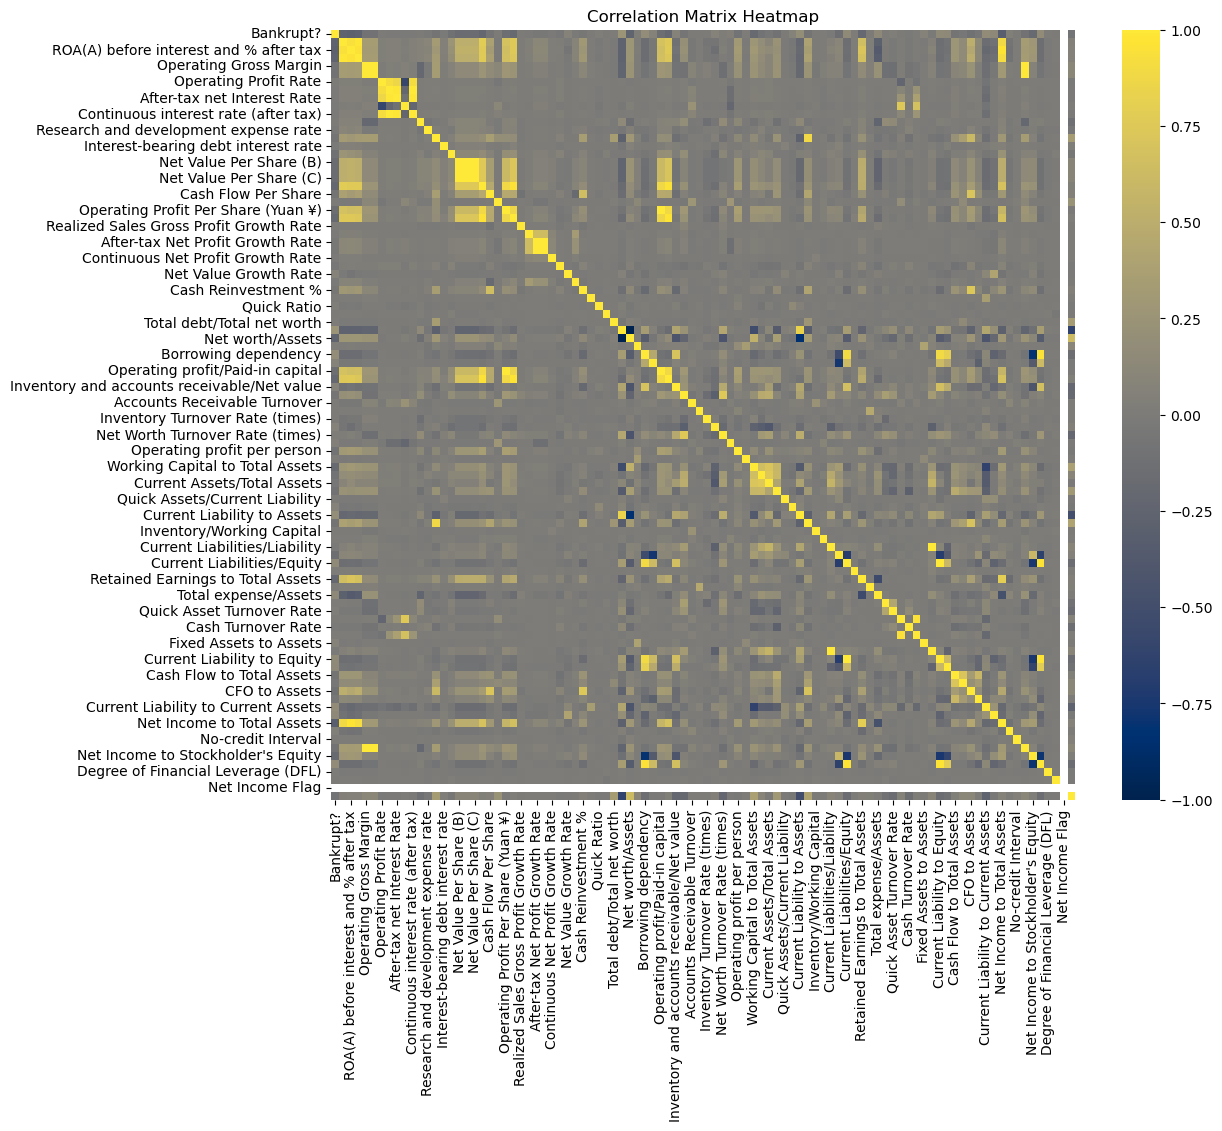

In [12]:
corr_matrix = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, fmt='.2f', cmap='cividis')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
corr_matrix

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
corr_row_index_0 = corr_matrix.iloc[0] # Find the row of bankrupt

# Filter the values to include higher than 0.2 and lower than -0.3 correlation values with the bankrupt columns
high_corr_values = corr_row_index_0[(corr_row_index_0 > 0.2) | (corr_row_index_0 < -0.3)]
high_corr_values

Bankrupt?                     1.000000
Debt ratio %                  0.250161
Net Income to Total Assets   -0.315457
Name: Bankrupt?, dtype: float64

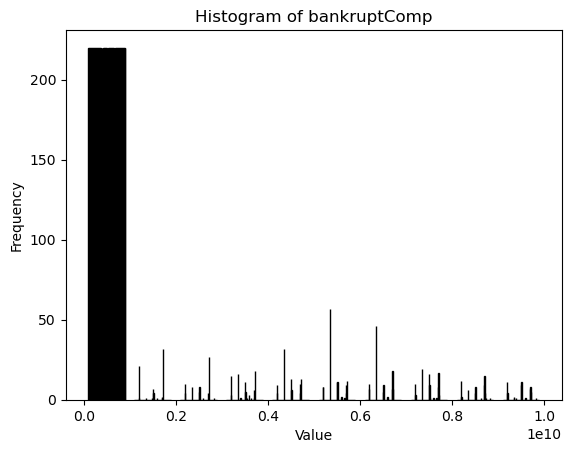

In [16]:
# Create the histogram
plt.hist(bankruptComp, edgecolor='black')

# Add titles and labels
plt.title('Histogram of bankruptComp')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()